# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [16]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Density Based Clustering

#### So far we have looked at k-means - a centroid based clustering algorithm and at hierarchical clustering - a conncectivity based clustering algorithm.

In this lesson we will look at DBSCAN - a density based clustering algorithm. DBSCAN clusters points by how close they are together. Typically we will define a threshold of proximity. Points that are closer than the threshold distance will be grouped together in the same cluster. We call this minimum distance epsilon. There are two things that we adjust in DBSCAN - epsilon and the minimum number of points needed to create a cluster. The main advantage of DBSCAN over k-means is that we do not need to specify the number of clusters in advance, instead we specify epsilon and min points. There are some situations where this clustering technique has an advantage over other techniques. We will examine such scenarios below.

To read more about DBSCAN, click [here](https://en.wikipedia.org/wiki/DBSCAN).

In [25]:
# We start the example by loading a circle generator from scikit-learn

from sklearn import datasets

n_samples = 1000
X, y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

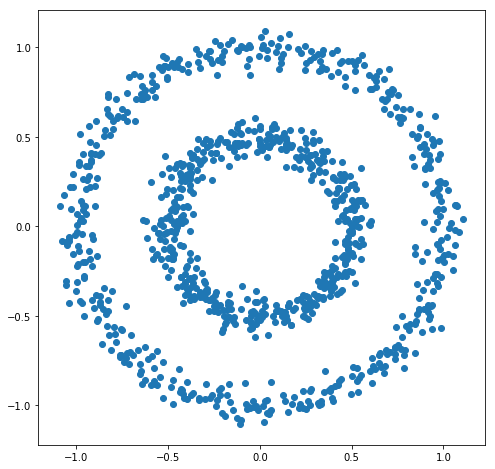

In [26]:
# Let's plot the data below

plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1])
plt.show()

#### Clearly finding clusters with k-means in this data will be very hard. Let's demonstrate this below.

We'll initialize a clustering object with 2 clusters, fit the data, and then produce the labels for the k-means clustering.

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
circle_kmeans = kmeans.fit(X)

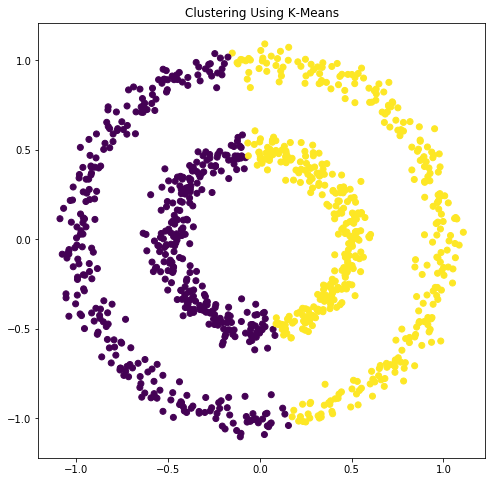

In [42]:
plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], c = circle_kmeans.labels_)
plt.title("Clustering Using K-Means")
plt.show()

#### In the plot above we see our circle data clustered using k-means. It does not quite capture the true separation in the data. 

However, if we used DBSCAN, we could group our data by density and therefore the inner circle and the outer circle would each be a cluster. We can see this in the cell below by initializing and fitting the DBSCAN model.

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2)
circle_dbscan = dbscan.fit(X)

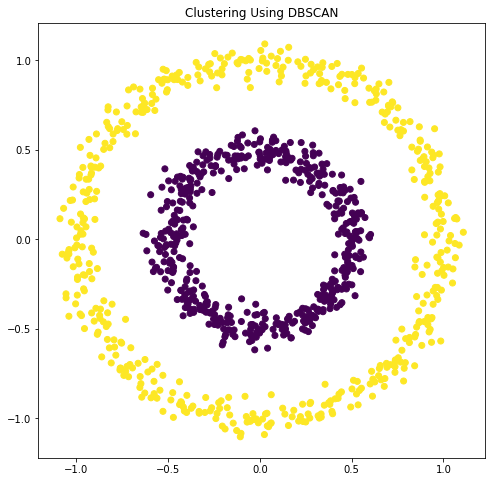

In [37]:
plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], c = circle_dbscan.labels_)
plt.title("Clustering Using DBSCAN")
plt.show()

#### Neither clustering method can be considered a right or wrong answer. However, each one captures something different in the data and each one has a different purpose.

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In [40]:
# loading the data:

customers = pd.read_csv('../Wholesale customers data.csv')

Print the `head()` of `customers`. Also, check the data types to ensure that they were correctly inferred by pandas.

In [45]:
# Your code here:

customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [49]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

#### Start by looking at the product information only.

Let's keep the `Channel` and `Region` data in the `customers` variable but create a new variable and call it `products`. Drop the `Channel` and `Region` data from the `products` dataset.

In [48]:
# Your code here:

products = customers.copy()
products.drop(columns=['Channel', 'Region'], inplace=True)

Plot a histogram for all remaining variables in `products`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002670F9E23C8>,
      dtype=object)

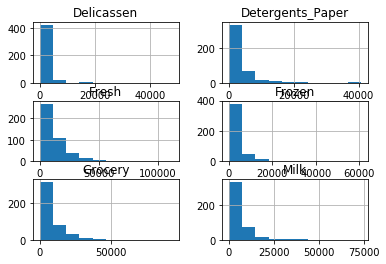

In [51]:
products.hist()

#### The distribution that we see here is typical of retail. Most customers buy very little and a few buy a lot. This is captured in the Pareto principle. You can read more about it [here](https://en.wikipedia.org/wiki/Pareto_principle).

However, let's look at the `describe` function to ensure there are no unusual outliers.

In [52]:
# Your code here:

products.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Our data shows fresh produce ranging between \$3 spent in one year by one customer and over \$100k spent by another. While this is a big range, it is not an unreasonable range. In other words, we do not have customers spending over a million dollars in one category. So we will opt not to drop any outliers.

# Challenge 2 - Process The Data

However, the large range between the values may cause an issue with our clustering. Particularly since the max values are double for `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`. Therefore, we will import the `StandardScaler` from `sklearn.preprocessing` and scale our data. Name the new scaled dataset `products_scale`.

Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [116]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

stscaler = StandardScaler().fit(products)
products_scale = stscaler.transform(products)

In the cell below, examine any missing data and remove if necessary.

In [53]:
# Your code here:

products.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# Challenge 3 - Cluster the Data

Now initialize a DBSCAN object in the cell below. For this case, let's decide epsilon is 0.5. Additionally, fit the model and assign the labels to the `labels` column in the original `products` dataset.

In [179]:
# Your code here:

dbscan = DBSCAN(eps=0.5)
products_dbscan = dbscan.fit(products_scale)
products['labels'] = products_dbscan.labels_
#products.labels = products.labels.astype(str)

What is the distribution of the clusters? (Note that the cluster labeled -1 is the outlier cluster)

In [178]:
# Your code here:
    
products.labels.value_counts()

 0    261
-1    174
 1      5
Name: labels, dtype: int64

Plot `Detergents_Paper` vs. `Milk`. Use the labels to color the scatter plot (If you would like a nicer color scheme, set `colormap="viridis"`).

Write your conclusion from this plot in the comments of the cell below in addition to your code.

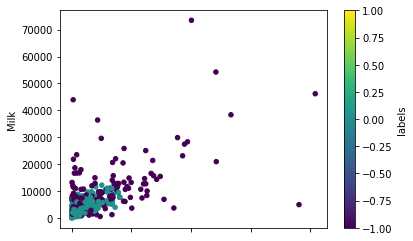

In [177]:
# Your code here:

products.plot.scatter(x="Detergents_Paper", y="Milk", c="labels", colormap="viridis")

Plot `Grocery` vs. `Fresh` using the labels to color the scatter plot. Interpret the graph in the comments of the cell below.

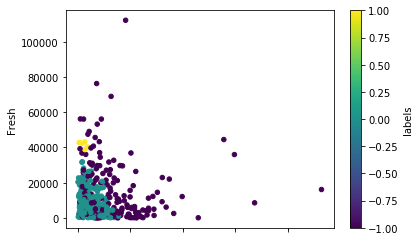

In [180]:
# Your code here:

products.plot.scatter(x="Grocery", y="Fresh", c="labels", colormap="viridis")

Let's use a groupby to see how the mean differs between the groups. Group `products` by `labels` and compute the mean for all columns.

In [181]:
# Your code here:

products.groupby("labels").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,15608.988506,10000.408046,13693.298851,4786.275862,5291.373563,2510.781609
0,9030.398467,3077.318008,4234.061303,1963.432950,1322.134100,881.773946
1,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000


Finally, let's add the `labels` column back to the `customers` dataset and see whether certain clusters dominate more in certain regions. Create a table that computes the frequency of the cluster label in each region.

In [182]:
# Your code here:

customers['labels'] = products['labels']
pd.crosstab(customers.Region, customers.labels)

labels,-1,0,1
Region,,,
1,29,48,0
2,20,27,0
3,125,186,5
